In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV




In [2]:
crime = pd.read_csv("New_Offense_Data_2024.csv")
codes = pd.read_csv("New_Offense_Data_2024.csv", encoding="latin1")

In [3]:
crime.head()

,Address,CaseNumber,CouncilDistrict,CrimeAgainst,CustomCrimeAgainst,CustomCrimeCategory,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseCount,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,ReportMonthYear
0,NaN,24-X5909611,Council District 3,Person,Person,Assault: Aggravated,Montavilla,1/1/2024,514,Assault Offenses,1,Aggravated Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
1,NaN,24-X5909638,Council District 1,Person,Person,Assault: Simple/Intimidation,Powellhurst-Gilbert,1/1/2024,429,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
2,NaN,24-X5909659,Council District 1,Person,Person,Assault: Simple/Intimidation,Hazelwood,1/1/2024,747,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
3,NaN,24-X5909665,Council District 2,Person,Person,Assault: Simple/Intimidation,Cully,1/1/2024,5,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
4,NaN,24-X5909704,Council District 2,Person,Person,Assault: Simple/Intimidation,Overlook,1/1/2024,1959,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57143 entries, 0 to 57142
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              51962 non-null  object 
 1   CaseNumber           57143 non-null  object 
 2   CouncilDistrict      56364 non-null  object 
 3   CrimeAgainst         57143 non-null  object 
 4   CustomCrimeAgainst   57143 non-null  object 
 5   CustomCrimeCategory  57143 non-null  object 
 6   Neighborhood         56645 non-null  object 
 7   OccurDate            57143 non-null  object 
 8   OccurTime            57143 non-null  int64  
 9   OffenseCategory      57143 non-null  object 
 10  OffenseCount         57143 non-null  int64  
 11  OffenseType          57143 non-null  object 
 12  OpenDataLat          51459 non-null  float64
 13  OpenDataLon          51459 non-null  float64
 14  OpenDataX            51459 non-null  float64
 15  OpenDataY            51459 non-null 

In [5]:
print(crime.shape[0])
print(crime.columns.tolist())
print(crime.dtypes)

57143
['Address', 'CaseNumber', 'CouncilDistrict', 'CrimeAgainst', 'CustomCrimeAgainst', 'CustomCrimeCategory', 'Neighborhood', 'OccurDate', 'OccurTime', 'OffenseCategory', 'OffenseCount', 'OffenseType', 'OpenDataLat', 'OpenDataLon', 'OpenDataX', 'OpenDataY', 'ReportDate', 'ReportMonthYear']
Address                 object
CaseNumber              object
CouncilDistrict         object
CrimeAgainst            object
CustomCrimeAgainst      object
CustomCrimeCategory     object
Neighborhood            object
OccurDate               object
OccurTime                int64
OffenseCategory         object
OffenseCount             int64
OffenseType             object
OpenDataLat            float64
OpenDataLon            float64
OpenDataX              float64
OpenDataY              float64
ReportDate              object
ReportMonthYear         object
dtype: object


In [6]:
crime.isnull().sum()

Address                5181
CaseNumber                0
CouncilDistrict         779
CrimeAgainst              0
CustomCrimeAgainst        0
CustomCrimeCategory       0
Neighborhood            498
OccurDate                 0
OccurTime                 0
OffenseCategory           0
OffenseCount              0
OffenseType               0
OpenDataLat            5684
OpenDataLon            5684
OpenDataX              5684
OpenDataY              5684
ReportDate                0
ReportMonthYear           0
dtype: int64

In [7]:
# طباعة عدد الصفوف المكررة
print(f"عدد الصفوف المكررة قبل الحذف: {crime.duplicated().sum()}")

عدد الصفوف المكررة قبل الحذف: 0


In [29]:
count = crime['OffenseCategory'].value_counts()
count

OffenseCategory
Larceny Offenses                24826
Assault Offenses                 7938
Vandalism                        6825
Motor Vehicle Theft              5410
Burglary                         4594
Fraud Offenses                   3040
Robbery                          1128
Weapon Law Violations             824
Drug/Narcotic Offenses            693
Sex Offenses                      555
Arson                             301
Prostitution Offenses             259
Counterfeiting/Forgery            259
Pornography/Obscene Material       69
Kidnapping/Abduction               67
Homicide Offenses                  66
Animal Cruelty Offenses            46
Embezzlement                       44
Extortion/Blackmail                40
Stolen Property Offenses           26
Human Trafficking Offenses         23
Bribery                             1
Name: count, dtype: int64

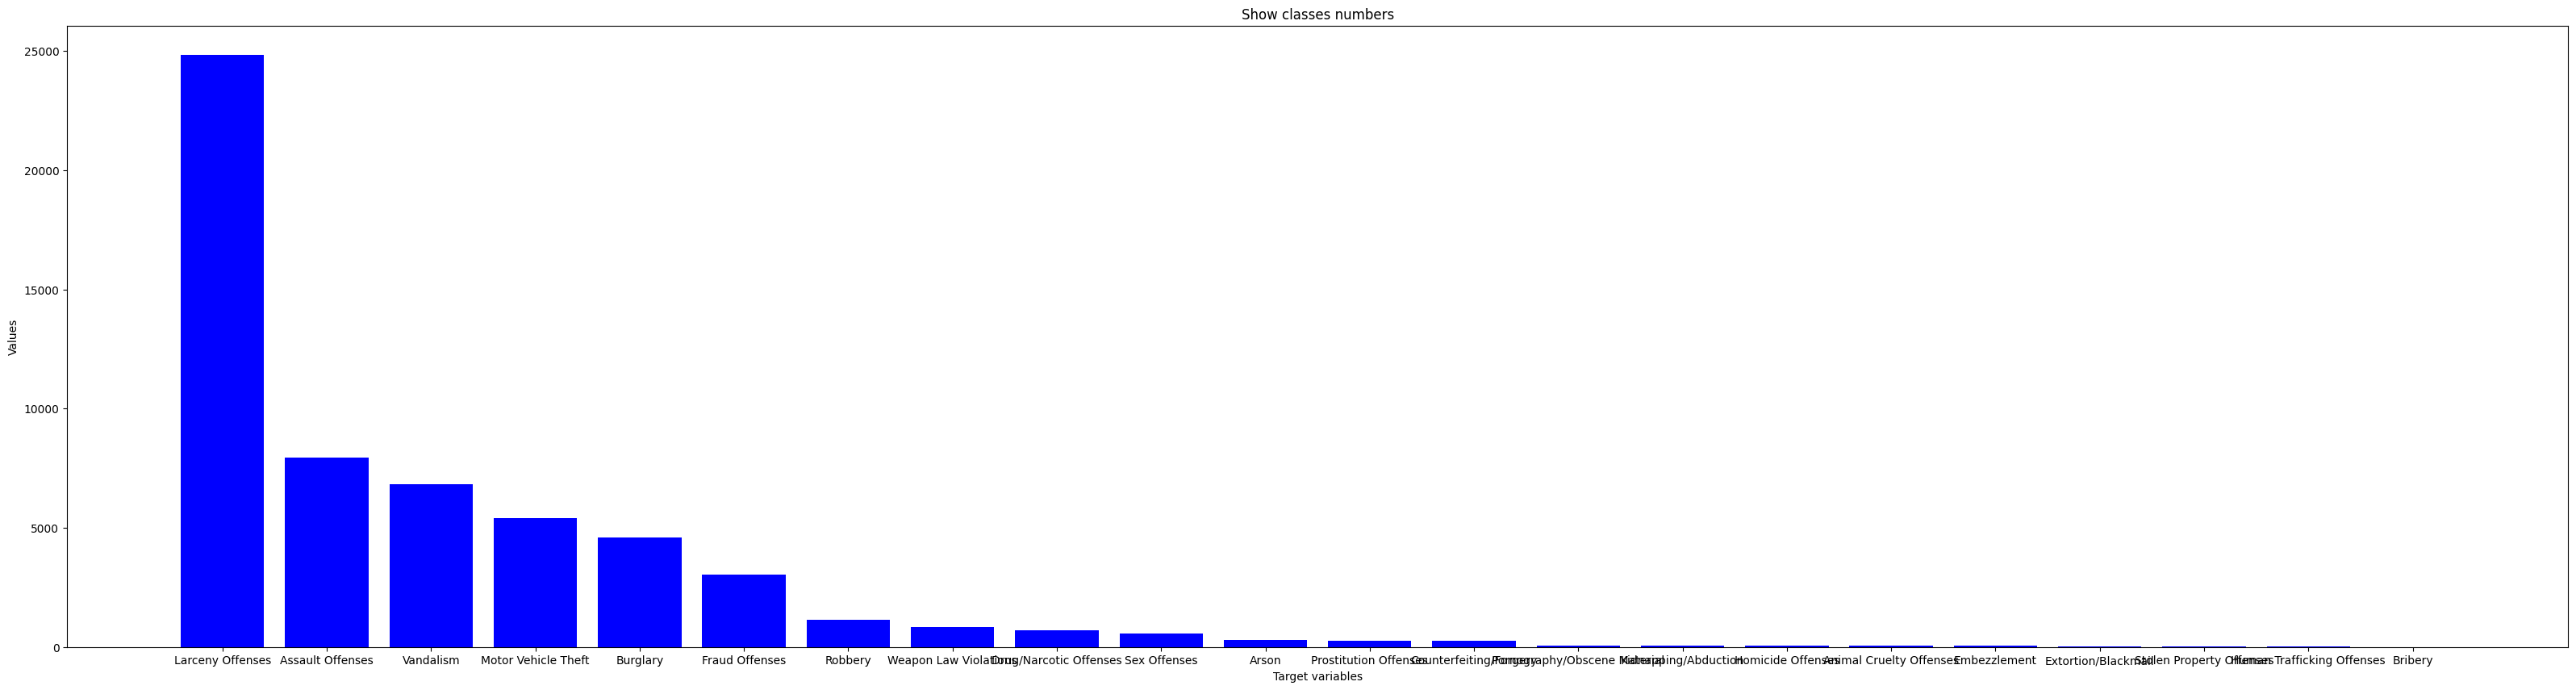

In [51]:
plt.figure(figsize=(40,10))
plt.bar(count.index, count.values, color='b' )
plt.xlabel('Target variables')
plt.ylabel('Values')
plt.title("Show classes numbers")
#plt.grid()
plt.show()

<Axes: >

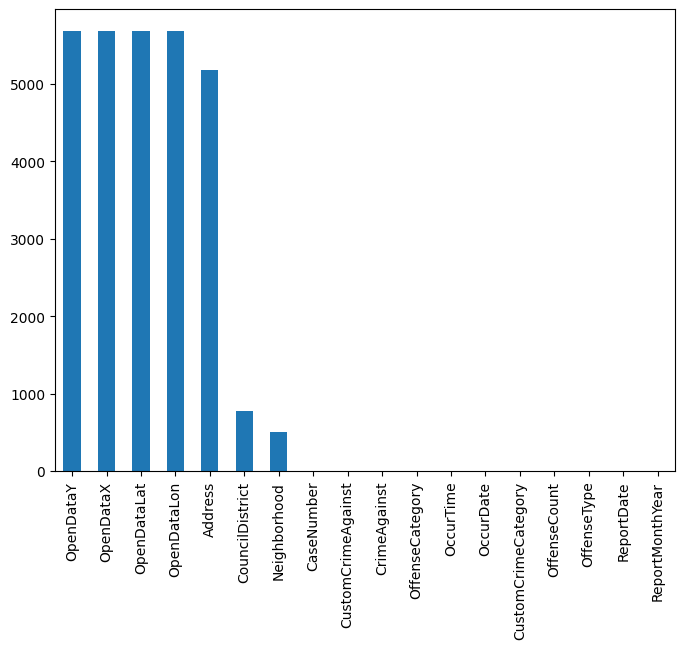

In [8]:
total = crime.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)


In [9]:
# حساب الوسيط لخط العرض والطول
median_lat = crime['OpenDataLat'].median()
median_lon = crime['OpenDataLon'].median()

# ملء القيم المفقودة باستخدام الوسيط (الطريقة الصحيحة لتجنب التحذير)
crime['OpenDataLat'] = crime['OpenDataLat'].fillna(median_lat)
crime['OpenDataLon'] = crime['OpenDataLon'].fillna(median_lon)

print("تم ملء القيم المفقودة في أعمدة OpenDataLat و OpenDataLon بنجاح.")

تم ملء القيم المفقودة في أعمدة OpenDataLat و OpenDataLon بنجاح.


In [10]:
# مثال: ملء القيم المفقودة في عمود الحي (Neighborhood) باستخدام المنوال
mode_neighborhood = crime['Neighborhood'].mode()[0]
#crime['Neighborhood'].fillna(mode_neighborhood, inplace=True)
crime['Neighborhood']=crime['Neighborhood'].fillna(mode_neighborhood)

print("تم ملء القيم المفقودة في عمود Neighborhood.")

تم ملء القيم المفقودة في عمود Neighborhood.


In [11]:
crime.isnull().sum()

Address                5181
CaseNumber                0
CouncilDistrict         779
CrimeAgainst              0
CustomCrimeAgainst        0
CustomCrimeCategory       0
Neighborhood              0
OccurDate                 0
OccurTime                 0
OffenseCategory           0
OffenseCount              0
OffenseType               0
OpenDataLat               0
OpenDataLon               0
OpenDataX              5684
OpenDataY              5684
ReportDate                0
ReportMonthYear           0
dtype: int64

In [12]:
# 1. تحويل عمود التاريخ إلى صيغة datetime
crime['OccurDate'] = pd.to_datetime(crime['OccurDate'])

# 2. استخراج خواص زمنية جديدة
crime['Occur_Year'] = crime['OccurDate'].dt.year
crime['Occur_Month'] = crime['OccurDate'].dt.month
crime['Occur_Day'] = crime['OccurDate'].dt.day
crime['Occur_DayOfWeek'] = crime['OccurDate'].dt.dayofweek # (0=الاثنين, 6=الأحد)

print("تم إضافة أعمدة جديدة: Occur_Year, Occur_Month, Occur_Day, Occur_DayOfWeek.")

تم إضافة أعمدة جديدة: Occur_Year, Occur_Month, Occur_Day, Occur_DayOfWeek.


In [13]:
# 1. تحويل OccurTime إلى رقمي أولاً (مع تحويل القيم غير الصالحة إلى NaN)
crime['OccurTime'] = pd.to_numeric(crime['OccurTime'], errors='coerce')

# 2. استخراج الساعة (Hour)
# نستخدم القسمة الصحيحة (// 100) للحصول على الجزء الصحيح (الساعة)
crime['Occur_Hour'] = (crime['OccurTime'] // 100).astype('Int64')

# 3. استخراج الدقيقة (Minute)
# نستخدم عامل المودولو (%) 100 للحصول على باقي القسمة (الدقيقة)
crime['Occur_Minute'] = (crime['OccurTime'] % 100).astype('Int64')

# 4. حذف عمود OccurTime الأصلي
crime.drop('OccurTime', axis=1, inplace=True)

print("تم إنشاء عمودين Occur_Hour و Occur_Minute بنجاح.")

تم إنشاء عمودين Occur_Hour و Occur_Minute بنجاح.


In [14]:
columns_to_drop = [
    'CaseNumber', 'Address', 'OccurDate',  'ReportDate', 
    'ReportMonthYear', 'OpenDataX', 'OpenDataY'
]

# تأكد من أنك لم تحذف الأعمدة الجديدة التي قمت بإنشائها (مثل Occur_Hour)
crime.drop(columns_to_drop, axis=1, inplace=True)

print(f"تم حذف الأعمدة غير الضرورية بنجاح. عدد الأعمدة المتبقية: {crime.shape[1]}")

تم حذف الأعمدة غير الضرورية بنجاح. عدد الأعمدة المتبقية: 16


In [15]:
crime.isnull().sum()

CouncilDistrict        779
CrimeAgainst             0
CustomCrimeAgainst       0
CustomCrimeCategory      0
Neighborhood             0
OffenseCategory          0
OffenseCount             0
OffenseType              0
OpenDataLat              0
OpenDataLon              0
Occur_Year               0
Occur_Month              0
Occur_Day                0
Occur_DayOfWeek          0
Occur_Hour               0
Occur_Minute             0
dtype: int64

In [16]:
# 1. تحديد الأعمدة الرقمية التي تحتاج إلى معالجة
numerical_cols = ['OpenDataLat', 'OpenDataLon', 'Occur_Hour', 'Occur_Minute']

# 2. تحديد حد Z-Score (3 انحرافات معيارية)
z_score = 3

for col in numerical_cols:
    # حساب الدرجة المعيارية المطلقة لكل قيمة
    # nan_policy='omit' تتجاهل القيم المفقودة المؤقتة (إن وجدت)
    crime[f'{col}_ZScore'] = np.abs(stats.zscore(crime[col], nan_policy='omit'))
    
    # 3. استبدال القيم المتطرفة (Z-Score > 3) بـ NaN
    # هذا يحافظ على حجم إطار البيانات مؤقتاً
    crime.loc[crime[f'{col}_ZScore'] > z_score, col] = np.nan

# 4. حذف الصفوف التي تحتوي على NaN الآن (التي كانت متطرفة وتم استبدالها)
crime.dropna(subset=numerical_cols, inplace=True)

# 5. حذف أعمدة Z-Score المساعدة
crime.drop([f'{col}_ZScore' for col in numerical_cols], axis=1, inplace=True)

print("✅ تم التعامل مع القيم المتطرفة (Outliers) في جميع الأعمدة الرقمية.")

✅ تم التعامل مع القيم المتطرفة (Outliers) في جميع الأعمدة الرقمية.


In [17]:
crime.describe().round(3)

,OffenseCount,OpenDataLat,OpenDataLon,Occur_Year,Occur_Month,Occur_Day,Occur_DayOfWeek,Occur_Hour,Occur_Minute
count,57034.000,57034.000,57034.000,57034.000,57034.000,57034.000,57034.000,57034.0,57034.0
mean,1.001,45.529,-122.642,2023.945,6.682,15.784,3.023,12.702,22.117
std,0.034,0.031,0.059,0.893,3.429,8.872,1.992,6.751,18.873
min,1.000,45.436,-122.818,1951.000,1.000,1.000,0.000,0.0,0.0
25%,1.000,45.515,-122.682,2024.000,4.000,8.000,1.000,8.0,0.0
50%,1.000,45.526,-122.660,2024.000,7.000,16.000,3.000,14.0,21.0
75%,1.000,45.548,-122.605,2024.000,10.000,23.000,5.000,18.0,38.0
max,4.000,45.622,-122.468,2024.000,12.000,31.000,6.000,23.0,59.0


In [18]:
# الأعمدة التي يجب قياسها (هي نفس الأعمدة التي عالجنا قيمها المتطرفة)
cols_to_scale = ['OpenDataLat', 'OpenDataLon', 'Occur_Hour', 'Occur_Minute']

# 1. تهيئة المُقيس
scaler = StandardScaler()

# 2. تطبيق القياس على البيانات (fit_transform)
# سيتم استبدال الأعمدة الأصلية بالقيم المقاسة (الموحدة)
scaled_data= crime[cols_to_scale] = scaler.fit_transform(crime[cols_to_scale])

scaled_data


array([[-0.1237915 , -0.30775653, -1.1409758 , -0.43007261],
       [-0.1237915 , -0.30775653, -1.28911156,  0.36470898],
       [-0.1237915 , -0.30775653, -0.84470426,  1.31844688],
       ...,
       [-1.27469077, -0.25777502,  0.48851766,  1.95427215],
       [-0.89342393, -0.35564389,  0.63665342, -1.17186876],
       [-0.56819218, -0.45302438,  0.48851766,  0.20575266]],
      shape=(57034, 4))

In [19]:
crime.describe().round(3)

,OffenseCount,OpenDataLat,OpenDataLon,Occur_Year,Occur_Month,Occur_Day,Occur_DayOfWeek,Occur_Hour,Occur_Minute
count,57034.000,57034.000,57034.000,57034.000,57034.000,57034.000,57034.000,57034.000,57034.000
mean,1.001,0.000,-0.000,2023.945,6.682,15.784,3.023,-0.000,0.000
std,0.034,1.000,1.000,0.893,3.429,8.872,1.992,1.000,1.000
min,1.000,-3.023,-3.009,1951.000,1.000,1.000,0.000,-1.882,-1.172
25%,1.000,-0.474,-0.680,2024.000,4.000,8.000,1.000,-0.697,-1.172
50%,1.000,-0.124,-0.308,2024.000,7.000,16.000,3.000,0.192,-0.059
75%,1.000,0.596,0.633,2024.000,10.000,23.000,5.000,0.785,0.842
max,4.000,2.981,2.975,2024.000,12.000,31.000,6.000,1.525,1.954


In [20]:
# تهيئة LabelEncoder
le = LabelEncoder()

# (سنستخدم 'OffenseCategory' مباشرة كما هو في الملف)
crime['OffenseCategory_Encoded'] = le.fit_transform(crime['OffenseCategory'])

In [21]:
crime_num = crime.select_dtypes(include = ['float64', 'int64']) 

# استخدام العمود المرمز الجديد 'OffenseCategory_Encoded'
target_col = 'OffenseCategory_Encoded'

crime_num_corr = crime_num.corr()[target_col][:-1] # -1 means that the latest row is SalePrice

top_features = crime_num_corr[abs(crime_num_corr) > 0].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5

print("There is {} strongly correlated values with OffenseCategory:\n{}".format(len(top_features), top_features))

There is 5 strongly correlated values with OffenseCategory:
Occur_Hour      0.031980
OpenDataLat     0.029488
OpenDataLon     0.014045
OffenseCount    0.012481
Occur_Minute   -0.082113
Name: OffenseCategory_Encoded, dtype: float64


In [ ]:


# --- الخطوة 5.1: تحديد وحذف الأعمدة غير الضرورية ---
#columns_to_drop = [
    #'OccurDate', 'OccurTime', 'ReportDate', 'ReportMonthYear', # تم استخراج ميزاتها (Features)
    #'Address', 'CaseNumber', 
    #'OpenDataX', 'OpenDataY' # تحتوي على قيم مفقودة لم تتم معالجتها
#]

# نستخدم نسخة نظيفة من البيانات لتطبيق التغييرات عليها
X = crime.drop(columns=columns_to_drop + ['OffenseCategory'], axis=1, errors='ignore')
Y = crime['OffenseCategory']

# --- الخطوة 5.2: معالجة مشكلة الفئات النادرة (الحل لمشكلة الخطأ) ---
# 1. حساب عدد التكرارات لكل فئة في Y
rare_classes_counts = Y.value_counts()
# 2. تحديد الفئات التي تحتوي على عنصر واحد فقط
rare_classes_to_remove = rare_classes_counts[rare_classes_counts <= 1].index

# 3. إنشاء قناع لتحديد الصفوف التي لا تحتوي على هذه الفئات النادرة
# ~ تعني "NOT IN" (ليس ضمن)
valid_indices = ~Y.isin(rare_classes_to_remove)

# 4. تصفية X و Y باستخدام المؤشرات الصالحة
X_filtered = X.loc[valid_indices]
Y_filtered = Y.loc[valid_indices]

print(f"تمت إزالة {len(Y) - len(Y_filtered)} صفوف تحتوي على فئات نادرة.")
print(f"شكل X بعد التصفية: {X_filtered.shape}")


# --- الخطوة 5.3: تشفير المتغيرات الفئوية المتبقية (One-Hot Encoding) ---
categorical_cols = X_filtered.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X_filtered, columns=categorical_cols, drop_first=True)

# --- الخطوة 6: تقسيم البيانات (Split Data) ---
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y_filtered, # نستخدم Y_filtered بعد تنظيفها من الفئات النادرة
    test_size=0.2, 
    random_state=42, 
    stratify=Y_filtered # نستخدم stratify على البيانات المُنقاة
)

print('\nتم تقسيم البيانات بنجاح.')
print('حجم مجموعة التدريب (X_train):', X_train.shape)
print('حجم مجموعة الاختبار (X_test):', X_test.shape)

تمت إزالة 1 صفوف تحتوي على فئات نادرة.
شكل X بعد التصفية: (57033, 16)

تم تقسيم البيانات بنجاح.
حجم مجموعة التدريب (X_train): (45626, 177)
حجم مجموعة الاختبار (X_test): (11407, 177)


In [23]:
# تحديد الأعمدة الرقمية التي لم يتم تشفيرها (الموقع والعدد)
# الأعمدة الزمنية (Occur_Hour/Minute) يفترض أنها موحدة قياسياً من قبل زميلك.
numerical_cols_for_scaling = ['OpenDataLat', 'OpenDataLon', 'OffenseCount', 
                               'Occur_Day', 'Occur_DayOfWeek'] 

scaler = StandardScaler()

# 1. تدريب المُوحِّد القياسي على بيانات التدريب فقط
X_train[numerical_cols_for_scaling] = scaler.fit_transform(X_train[numerical_cols_for_scaling])

# 2. تطبيق التحويل على بيانات الاختبار
X_test[numerical_cols_for_scaling] = scaler.transform(X_test[numerical_cols_for_scaling])

print("تم التوحيد القياسي للمتغيرات الرقمية بنجاح.")



تم التوحيد القياسي للمتغيرات الرقمية بنجاح.


In [24]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dt_model.fit(X_train, Y_train)

# 2. التنبؤ والتقييم
dt_predictions = dt_model.predict(X_test)
dt_accuracy = metrics.accuracy_score(Y_test, dt_predictions)

print(f"دقة نموذج Decision Tree: {dt_accuracy:.2f}")

دقة نموذج Decision Tree: 0.99


In [25]:
k=20
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, Y_train)

# 2. التنبؤ والتقييم
knn_predictions = knn_model.predict(X_test)
knn_accuracy = metrics.accuracy_score(Y_test, knn_predictions)
print(f"دقة نموذج KNN: {knn_accuracy:.3f}")
#print("Test set Accuracy: ", metrics.accuracy_score(Y_test, knn_predictions))

دقة نموذج KNN: 0.989


In [26]:
# نطاق البحث الجديد المقترح (أكثر اعتدالاً)
param_grid = {
    # C: البحث بين 10 و 75 (لتجنب 100 Overfitting و 1 Underfitting)
    'C': [10, 25, 50, 75],  
    # gamma: نبقيها صغيرة جداً للمساعدة في التنظيم
    'gamma': [0.01, 0.05, 0.1], 
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(
    SVC(random_state=42), 
    param_grid, 
    cv=5, # استخدام 5-fold Cross-Validation
    scoring='accuracy', 
    n_jobs=-1
)

print("جاري تشغيل Grid Search للبحث عن أفضل معاملات SVM...")
svm_grid.fit(X_train, Y_train)

# استخراج النتائج
best_svm_model = svm_grid.best_estimator_
best_score = svm_grid.best_score_

print(f"\n✅ أفضل مجموعة معاملات لـ SVM: {svm_grid.best_params_}")
print(f"أفضل دقة عبر Cross-Validation: {best_score:.4f}")

# التقييم النهائي
final_test_accuracy = accuracy_score(Y_test, best_svm_model.predict(X_test))
print(f"دقة النموذج الأفضل على بيانات الاختبار: {final_test_accuracy:.4f}")

جاري تشغيل Grid Search للبحث عن أفضل معاملات SVM...


KeyboardInterrupt: 

In [ ]:
svm_model = SVC(C=1.0, gamma='scale', kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
svm_prediction=svm_model.predict(X_test)
svm_accuracy=accuracy_score(Y_test,svm_prediction)
print(f"الدقة الكلية (Accuracy): {svm_accuracy:.4f}")
print(classification_report(Y_test, svm_prediction))

الدقة الكلية (Accuracy): 0.4353
                              precision    recall  f1-score   support

     Animal Cruelty Offenses       0.00      0.00      0.00         9
                       Arson       0.00      0.00      0.00        60
            Assault Offenses       0.00      0.00      0.00      1588
                    Burglary       0.00      0.00      0.00       919
      Counterfeiting/Forgery       0.00      0.00      0.00        52
      Drug/Narcotic Offenses       0.00      0.00      0.00       139
                Embezzlement       0.00      0.00      0.00         9
         Extortion/Blackmail       0.00      0.00      0.00         8
              Fraud Offenses       0.00      0.00      0.00       608
           Homicide Offenses       0.00      0.00      0.00        13
  Human Trafficking Offenses       0.00      0.00      0.00         4
        Kidnapping/Abduction       0.00      0.00      0.00        13
            Larceny Offenses       0.44      1.00      0.

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# التنبؤ على بيانات التدريب نفسها
svm_train_predictions = svm_model.predict(X_train)
svm_train_accuracy = metrics.accuracy_score(Y_train, svm_train_predictions)

print(f"دقة التدريب (Training Accuracy): {svm_train_accuracy:.4f}")

دقة التدريب (Training Accuracy): 1.0000
